# Intermediate Linear Regression Practice

## Use a Linear Regression model to get the lowest RMSE possible on the following dataset:

[Dataset Folder](https://github.com/ryanleeallred/datasets/tree/master/Ames%20Housing%20Data)

[Raw CSV](https://raw.githubusercontent.com/ryanleeallred/datasets/master/Ames%20Housing%20Data/train.csv)

## You model must include (at least):
- A log-transformed y variable
- Two polynomial features
- One interaction feature
- 10 other engineered features

What is the lowest Root-Mean-Squared Error that you are able to obtain? Share your best RMSEs in Slack!

Notes:

There may be some data cleaning that you need to do on some features of this dataset. Linear Regression will only accept numeric values and will not accept

Note* There may not be a clear candidate for an interaction term in this dataset. Include one anyway, sometimes it's a good practice for predictive modeling feature engineering in general. 

In [227]:
!pip3 uninstall seaborn

Uninstalling seaborn-0.9.0:
  Would remove:
    /usr/local/lib/python3.6/dist-packages/seaborn-0.9.0.dist-info/*
    /usr/local/lib/python3.6/dist-packages/seaborn/*
Proceed (y/n)? n


In [228]:
# restart runtime after running cell
!pip3 --no-cache-dir install seaborn

In [0]:
# Imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [0]:
##### Your Code Here #####


df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/Ames%20Housing%20Data/train.csv')
df = df.drop(['Id'], axis=1)
df = df.fillna(0)


# easy way to encode categoricals without pulling in a bunch of mess
def clean_cat(df):
  for col_name in df.columns:
      if(df[col_name].dtype == 'object'):
          df[col_name]= df[col_name].astype('category')
          df[col_name] = df[col_name].cat.codes
          



clean_cat(df)

In [231]:
pd.set_option('display.max_columns', 100)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,3,65.0,8450,1,0,3,3,0,4,0,5,2,2,0,5,7,5,2003,2003,1,1,12,13,2,196.0,2,4,2,3,4,4,3,706,6,0,150,856,1,0,1,5,856,854,0,1710,1,0,2,1,3,1,2,8,6,0,0,2,2003.0,2,2,548,5,5,2,0,61,0,0,0,0,0,0,0,0,2,2008,8,4,208500
1,20,3,80.0,9600,1,0,3,3,0,2,0,24,1,2,0,2,6,8,1976,1976,1,1,8,8,3,0.0,3,4,1,3,4,2,1,978,6,0,284,1262,1,0,1,5,1262,0,0,1262,0,1,2,0,3,1,3,6,6,1,5,2,1976.0,2,2,460,5,5,2,298,0,0,0,0,0,0,0,0,0,5,2007,8,4,181500
2,60,3,68.0,11250,1,0,0,3,0,4,0,5,2,2,0,5,7,5,2001,2002,1,1,12,13,2,162.0,2,4,2,3,4,3,3,486,6,0,434,920,1,0,1,5,920,866,0,1786,1,0,2,1,3,1,2,6,6,1,5,2,2001.0,2,2,608,5,5,2,0,42,0,0,0,0,0,0,0,0,9,2008,8,4,223500
3,70,3,60.0,9550,1,0,0,3,0,0,0,6,2,2,0,5,7,5,1915,1970,1,1,13,15,3,0.0,3,4,0,4,2,4,1,216,6,0,540,756,1,2,1,5,961,756,0,1717,1,0,1,0,3,1,2,7,6,1,3,6,1998.0,3,3,642,5,5,2,0,35,272,0,0,0,0,0,0,0,2,2006,8,0,140000
4,60,3,84.0,14260,1,0,0,3,0,2,0,15,2,2,0,5,8,5,2000,2000,1,1,12,13,2,350.0,2,4,2,3,4,1,3,655,6,0,490,1145,1,0,1,5,1145,1053,0,2198,1,0,2,1,4,1,2,9,6,1,5,2,2000.0,2,3,836,5,5,2,192,84,0,0,0,0,0,0,0,0,12,2008,8,4,250000


In [232]:
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Skewness: 1.882876
Kurtosis: 6.536282


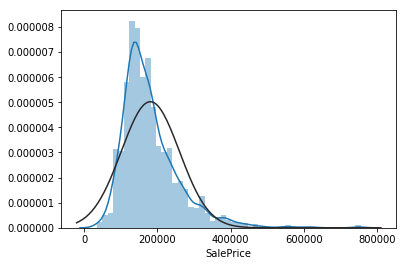

In [233]:
print("Skewness: %f" % df['SalePrice'].skew())
print("Kurtosis: %f" % df['SalePrice'].kurt())
sns.distplot(df['SalePrice'], fit=stats.norm);

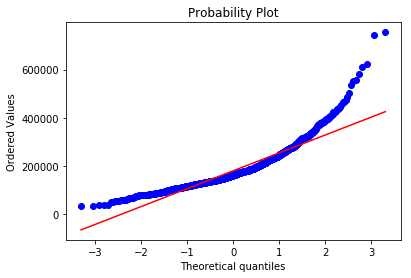

In [234]:
probability_plot_sales = stats.probplot(df['SalePrice'], plot=plt)

# Facts about our sale prices

1. They deviate from the normal distribution, aka bell curve.
2. Arrr data be skewed like a pirate. 
3. Has a peak.

# On unevenly distributed data

We have positive skew, meaning the mean exceeds the mode, by about 2 factors. Hello papa.

The kurtosis of the tails of the data is a measure of the combined weight of a distribution's tails relative to the center of the distribution. If kurtosis is greater than 5, that means we have a tail that exceeds +/- 3 entire standard deviations, so you know we have some outliers in our sale price that need to be taken care of.


## Kill the outliers!

In [0]:
df = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]

# Check the distribution again, to see how it stacks up



Skewness: 0.829840
Kurtosis: 0.556674


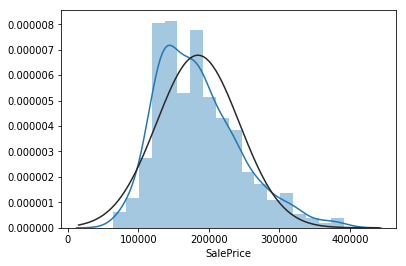

In [236]:
print("Skewness: %f" % df['SalePrice'].skew())
print("Kurtosis: %f" % df['SalePrice'].kurt())
sns.distplot(df['SalePrice'], fit=stats.norm);

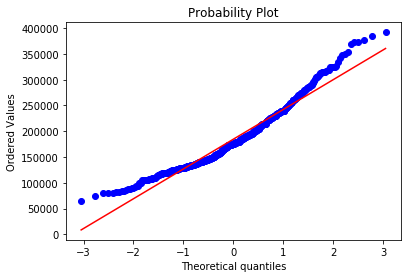

In [237]:
probability_plot_sales = stats.probplot(df['SalePrice'], plot=plt)

# Ouchies

It seems to deviate pretty heavily, but we know that there is a positive skew to the data..soooo, we can transform our sales data with the log function. (which we already did, aha)

Get ready to see some magic. Presto!

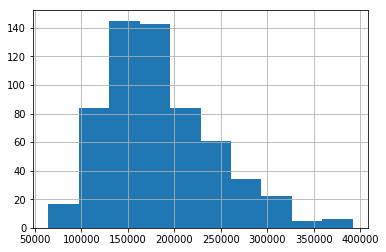

In [238]:
df['log_price'] = np.log(df['SalePrice'])
df.SalePrice.hist()

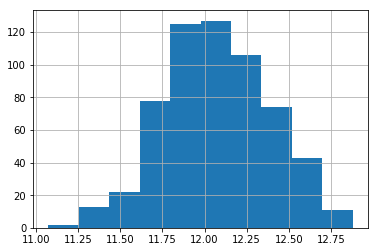

In [239]:
df.log_price.hist()

Skewness: 0.829840
Kurtosis: 0.556674


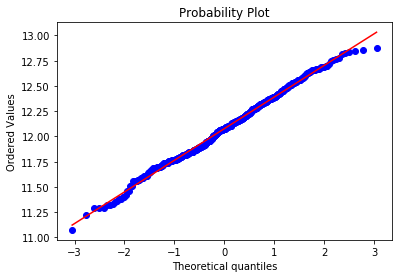

In [240]:
probability_plot_sales = stats.probplot(df['log_price'], plot=plt)

print("Skewness: %f" % df['SalePrice'].skew())
print("Kurtosis: %f" % df['SalePrice'].kurt())


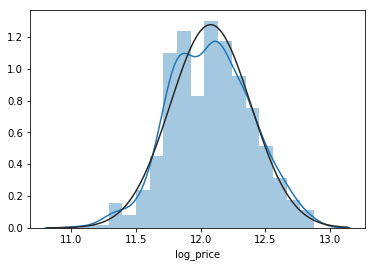

In [241]:
sns.distplot(df['log_price'], fit=stats.norm);

#Hi there neighbor, I'm your scalar scaler.



# Selecting features at random like a bad boy.

In [242]:
features_target = df.filter(['GrLivArea', 'YearBuilt', 'YearRemodAdd', 
                             'TotalBsmtSF', 'OverallQual', 'log_price'])
features_target.head()


,GrLivArea,YearBuilt,YearRemodAdd,TotalBsmtSF,OverallQual,log_price
0,1710,2003,2003,856,7,12.247694
2,1786,2001,2002,920,7,12.317167
4,2198,2000,2000,1145,8,12.429216
6,1694,2004,2005,1686,8,12.634603
10,1040,1965,1965,1040,5,11.771436


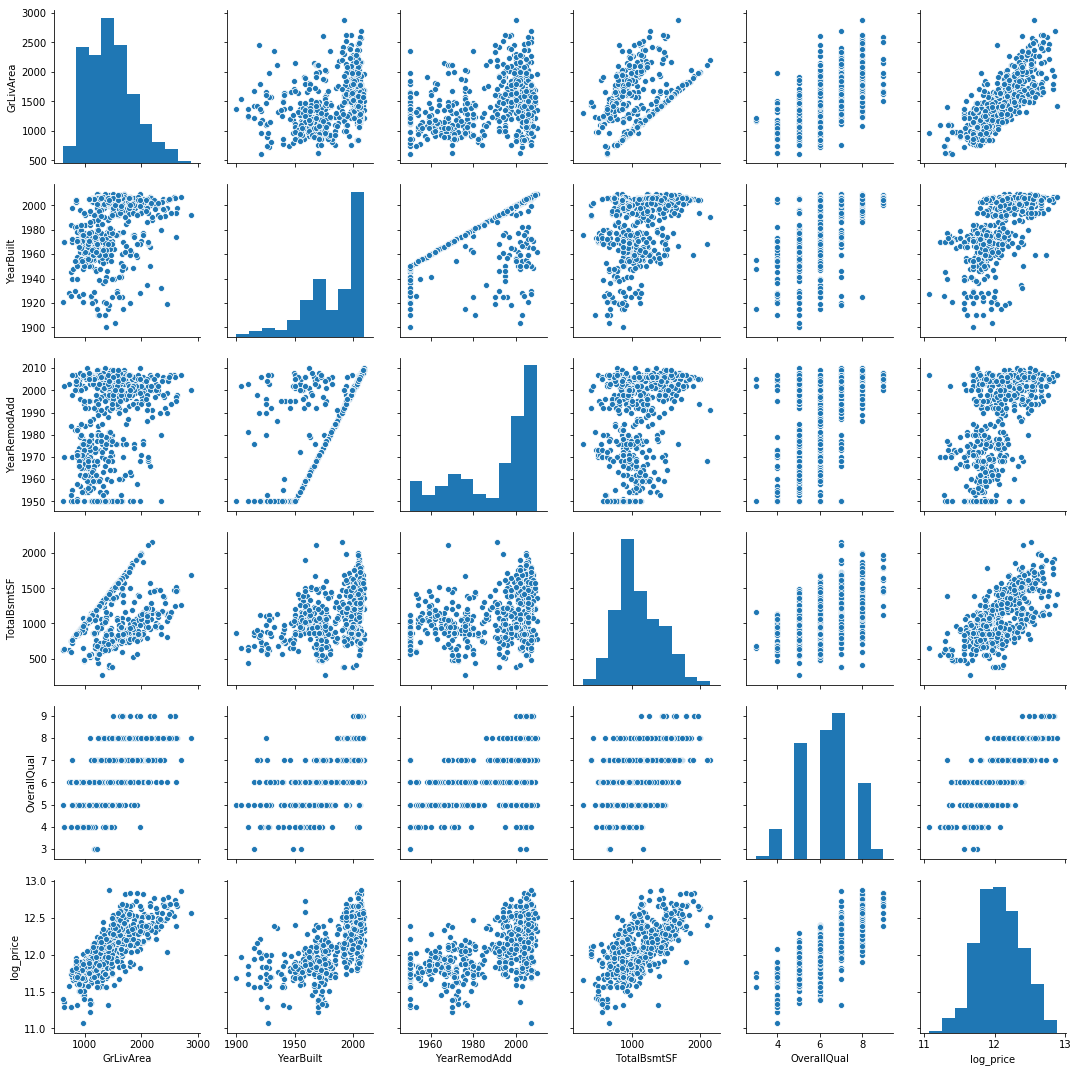

In [243]:
sns.pairplot(data=features_target);

# Make room, make room, make room and selecting features in a more intelligent way

Really the only direct relationship we see from this subset of features is the general living area, and total basement sf, with a positive correlation between price and increase in area.

People want more space I suppose.

However, using what we know about correlational matrices and seaborne's heatmap, we can gain some heavy intuition for feature contribution to our target.

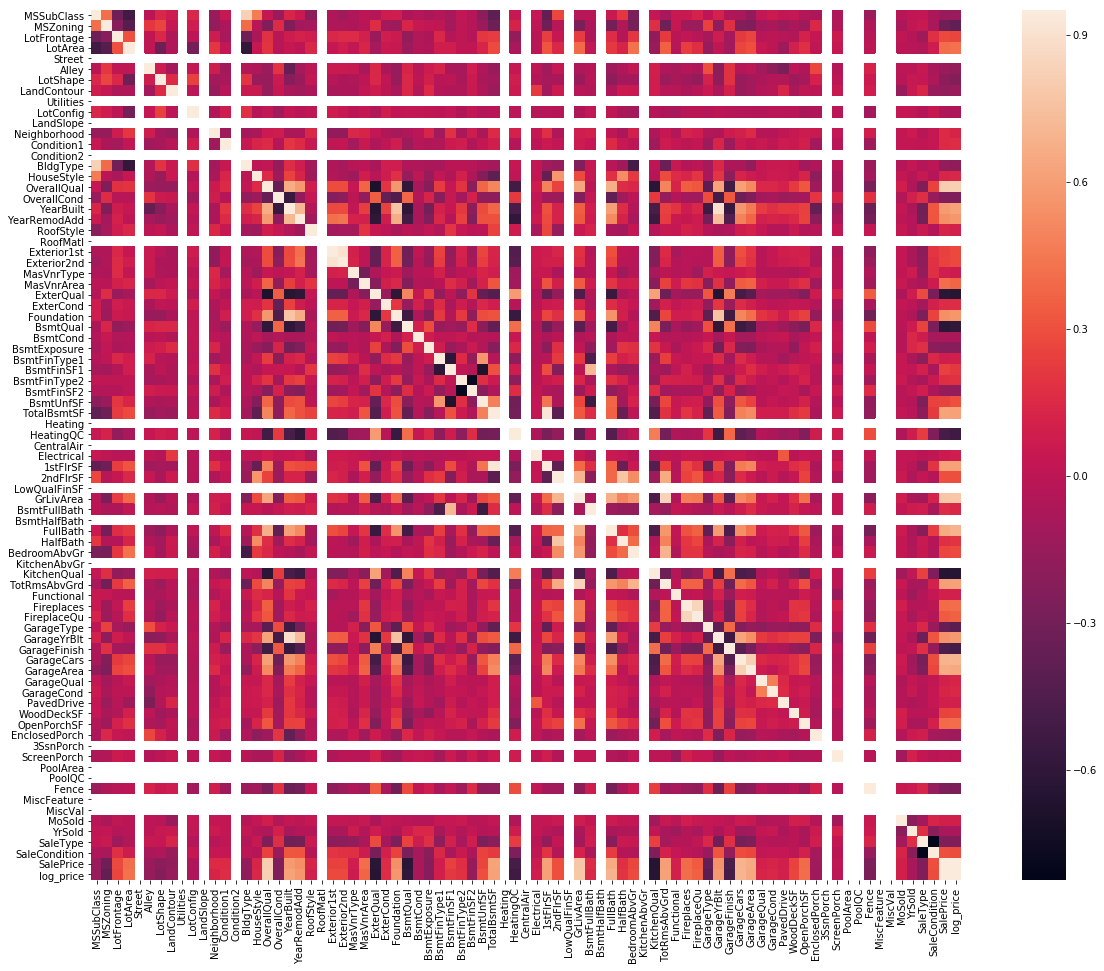

In [244]:
correlation_matrix = df.corr()
f, ax = plt.subplots(figsize=(22, 16))
sns.heatmap(correlation_matrix, vmax=.95, square=True);



Now, that may be a little hard to understand, and it might be a bit flashy on the eyes, so why don't we stack up and 
compare.

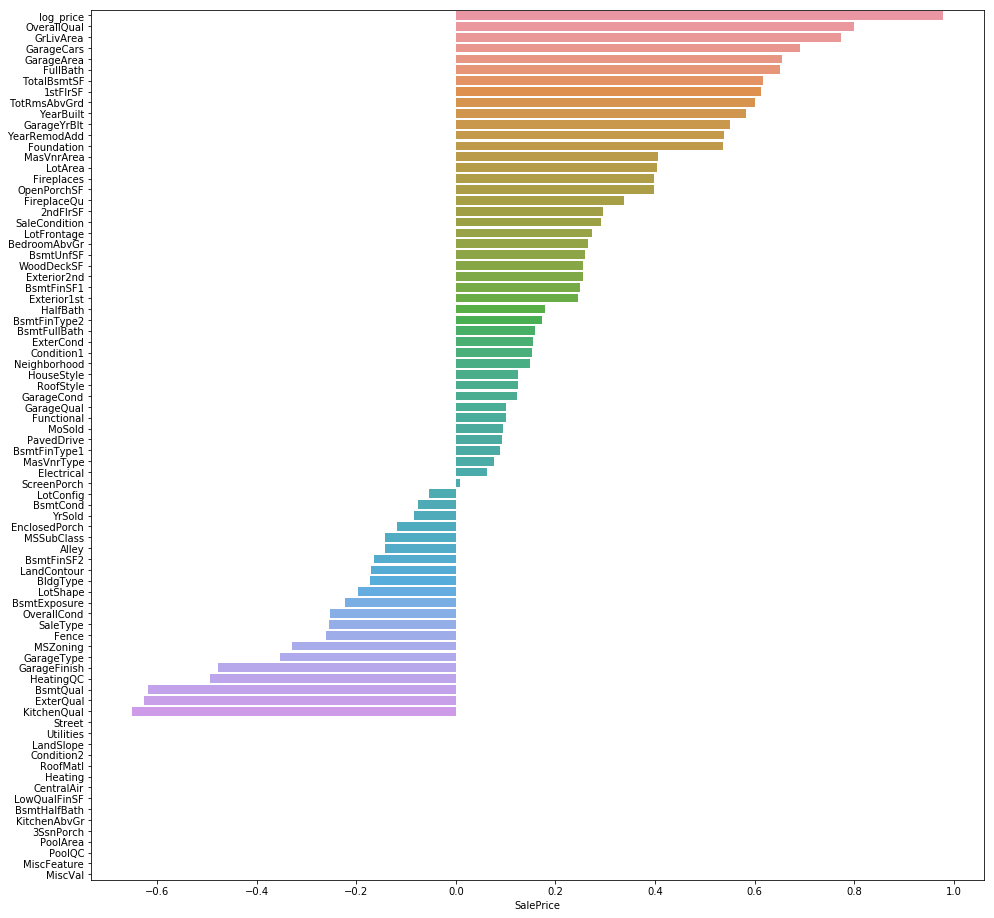

In [245]:
corr_for_bar = correlation_matrix.sort_values('SalePrice', ascending=False)
plt.figure(figsize=(16,16))
           
ax = sns.barplot(corr_for_bar.SalePrice[1:], corr_for_bar.index[1:], orient='h')
plt.show()

# The eyes have it!

This heatmap generated from the correlational matrix of all our columns really helps hone in on the most highly corrrelated features and sale price. I picked the 6 features with the highest correlation.

In [298]:

y = df.filter(['log_price'])


df.GrLivArea = df.GrLivArea.astype(int)
X = df.filter(['GrLivArea', 'OverallQual', 'TotalBsmtSF', 'GarageArea', 
               'GarageCars', 'OverallCond', 'FullBath'])

# Slit into test and train datasets
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=.30, 
                                                    random_state=42)

# i use the StadardScaler here because i took the liberty of identifying and 
# removing my outliers previously with the IQR as a baseline
scaler = StandardScaler() 

X_train = scaler.fit_transform(X_train)

# do not fit the test data
X_test = scaler.transform(X_test)

# fit model using train datasets
model = LinearRegression()
model.fit(X_train, Y_train)

# Create new predictions using x_test
y_pred = model.predict(X_test)

# Measure Accuracy using y_test and y_pred
RMSE = (np.sqrt(mean_squared_error(Y_test, y_pred)))
R2 = r2_score(Y_test, y_pred)

print('RMSE is {}'.format(RMSE))
print('R^2 is {}'.format(R2))

print("coefficients: ", model.coef_)
print("intercepts: ", model.intercept_)

RMSE is 0.10454067857231737
R^2 is 0.8866126333975747
coefficients:  [[0.11798613 0.10493315 0.06844573 0.02033134 0.04623523 0.02099791
  0.01242752]]
intercepts:  [12.06716579]


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


#Engineering  Features

I think we can still do better, if we go back and look at the dataset, we can see that the rating of the quality of a house lies between 1-10. Why don't we try breaking that up and simplifying our features.



# The good, the bad, and the ugly

In [0]:
df["Quality_Simplified"] = df.OverallQual.replace({1 : 1, 2 : 1, 3 : 1, 
                                                   4 : 2, 5 : 2, 6 : 2, 
                                                   7 : 3, 8 : 3, 9 : 3, 10 : 3 
                                                      })



df["Condition_Simplified"] = df.OverallCond.replace({1 : 1, 2 : 1, 3 : 1, 
                                                       4 : 2, 5 : 2, 6 : 2, 
                                                       7 : 3, 8 : 3, 9 : 3, 10 : 3}) 

#Testing  new features and you might be suprised.

Simplifying data sometimes has repercussions! Giving less operatives to predict from has actually made our model slightly worse, as you can see below. So i'm throwing those simplified features out, because they perform subpar to my manual feature selection.

In [301]:
y = df.filter(['log_price'])


df.GrLivArea = df.GrLivArea.astype(int)
X = df.filter(['GrLivArea', 'Quality_Simplified', 'TotalBsmtSF', 'GarageArea', 
               'GarageCars', 'Condition_Simplified', 'FullBath'])

# Slit into test and train datasets
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=.30, 
                                                    random_state=42)



X_train = scaler.fit_transform(X_train)

# do not fit the test data
X_test = scaler.transform(X_test)

# fit model using train datasets
model = LinearRegression()
model.fit(X_train, Y_train)

# Create new predictions using x_test
y_pred = model.predict(X_test)

# Measure Accuracy using y_test and y_pred
RMSE = (np.sqrt(mean_squared_error(Y_test, y_pred)))
R2 = r2_score(Y_test, y_pred)

print('RMSE is {}'.format(RMSE))
print('R^2 is {}'.format(R2))

print("coefficients: ", model.coef_)
print("intercepts: ", model.intercept_)

RMSE is 0.11254570546674283
R^2 is 0.8685828952406051
coefficients:  [[0.13161191 0.06000406 0.07969693 0.01980191 0.05320823 0.01908633
  0.02667117]]
intercepts:  [12.06716579]


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


# What about combining features?


In [0]:
df["House_Grade"] = df["OverallQual"] * df["OverallCond"]

In [308]:
y = df.filter(['log_price'])


df.GrLivArea = df.GrLivArea.astype(int)
X = df.filter(['GrLivArea', 'TotalBsmtSF', 'GarageArea', 
               'GarageCars', 'House_Grade', 'FullBath'])

# Slit into test and train datasets
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=.30, 
                                                    random_state=42)


X_train = scaler.fit_transform(X_train)

# do not fit the test data
X_test = scaler.transform(X_test)

# fit model using train datasets
model = LinearRegression()
model.fit(X_train, Y_train)

# Create new predictions using x_test
y_pred = model.predict(X_test)

# Measure Accuracy using y_test and y_pred
RMSE = (np.sqrt(mean_squared_error(Y_test, y_pred)))
R2 = r2_score(Y_test, y_pred)

print('RMSE is {}'.format(RMSE))
print('R^2 is {}'.format(R2))

print("coefficients: ", model.coef_)
print("intercepts: ", model.intercept_)

RMSE is 0.10683191030236311
R^2 is 0.8815879150732367
coefficients:  [[0.12345592 0.08155672 0.02023478 0.05886357 0.05843626 0.04060415]]
intercepts:  [12.06716579]


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  app.launch_new_instance()


#Some simple polynomial features

In [0]:
df["OverallQual-s2"] = df["OverallQual"] ** 2
df["OverallQual-s3"] = df["OverallQual"] ** 3
df["OverallQual-Sq"] = np.sqrt(df["OverallQual"]) # performs best


df["OverallCond-s2"] = df["OverallCond"] ** 2
df["OverallCond-s3"] = df["OverallCond"] ** 3
df["OverallCond-Sq"] = np.sqrt(df["OverallCond"])

df["GrLivArea-s2"] = df["GrLivArea"] ** 2
df["GrLivArea-s3"] = df["GrLivArea"] ** 3
df["GrLivArea-Sq"] = np.sqrt(df["GrLivArea"])

df["TotalBsmtSF-s2"] = df["TotalBsmtSF"] ** 2
df["TotalBsmtSF-s3"] = df["TotalBsmtSF"] ** 3
df["TotalBsmtSF-Sq"] = np.sqrt(df["TotalBsmtSF"])

df["FullBath-s2"] = df["FullBath"] ** 2
df["FullBath-s3"] = df["FullBath"] ** 3
df["FullBath-Sq"] = np.sqrt(df["FullBath"])

In [324]:
y = df.filter(['log_price'])


df.GrLivArea = df.GrLivArea.astype(int)
X = df.filter(['GrLivArea-Sq', 'OverallQual-Sq', 'TotalBsmtSF-Sq', 'GarageArea', 
               'GarageCars', 'OverallCond-Sq', 'FullBath-Sq'])

# Slit into test and train datasets
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=.30, 
                                                    random_state=42)

X_train = scaler.fit_transform(X_train)

# do not fit the test data
X_test = scaler.transform(X_test)

# fit model using train datasets
model = LinearRegression()
model.fit(X_train, Y_train)

# Create new predictions using x_test
y_pred = model.predict(X_test)

# Measure Accuracy using y_test and y_pred
RMSE = (np.sqrt(mean_squared_error(Y_test, y_pred)))
R2 = r2_score(Y_test, y_pred)

print('RMSE is {}'.format(RMSE))
print('R^2 is {}'.format(R2))

print("coefficients: ", model.coef_)
print("intercepts: ", model.intercept_)

RMSE is 0.10243213959455061
R^2 is 0.8911404516539412
coefficients:  [[0.12021479 0.10468864 0.0690754  0.02328787 0.04647245 0.02189966
  0.00813727]]
intercepts:  [12.06716579]


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  from ipykernel import kernelapp as app


# Models are teases. Right below 90, right above 10. 

Pfffft.

# Stretch Goals

- Write a blog post explaining one of today's topics.
- Find a new regression dataset from the UCI machine learning repository and use it to test out your new modeling skillz.
 [ - UCI Machine Learning Repository - Regression Datasets](https://)
- Make a list for yourself of common feature engineering techniques. Browse Kaggle kernels to learn more methods.
- Start studying for tomorrow's topic: Gradient Descent
- Try and make the ultimate model with this dataset. clean as many features as possible, engineer the most sensible features as possible and see how accurate of a prediction you can make. 
- Learn about the "Dummy Variable Trap" and how it applies to linear regression modeling.
- Learning about using linear regression to model time series data